# Data stats

In [13]:
%%javascript
$('<div id="toc"></div>').css({position: 'fixed', top: '120px', left: 0}).appendTo(document.body);
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js');


<IPython.core.display.Javascript object>

In [14]:
import pandas as pd
import numpy as np
import re
import json
from tqdm import tqdm, trange

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)


In [16]:
# change matplotlib parameters
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 30})

# COVIDSenti - Sentiments

In [17]:
# sentiment
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8545013/pdf/tcss-razzak-3051189.pdf

In [18]:
path = "../data/COVIDSenti/"

df = pd.read_csv(path+'COVIDSenti.csv')
df

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
89995,@C_Racing48 The flu has a 2% death rate.. the ...,neu
89996,@realDonaldTrump We already know that but you‚...,neg
89997,First coronavirus case reported in St. Joseph ...,neu
89998,"If you ate ants when you were a child, you‚Äôr...",neu


In [19]:
skf = StratifiedKFold(n_splits=5)

In [20]:
y = df['label'].tolist()
X = df['tweet'].tolist()
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    count = [0,0,0]
    for ind in train_index:
        if y[ind]=='neu':
            count[1]+=1
        elif y[ind]=='neg':
            count[0]+=1
        else:
            count[2]+=1
            
    sub_df = df.iloc[test_index]
    sub_df.to_csv('../data/COVIDSenti/fold'+str(i)+'.csv', index=False)

In [21]:
sub = df['label'].tolist()
counts = [sub.count(a) for a in ['neg', 'neu', 'pos']]
counts

[16335, 67385, 6280]

C:\Users\ricca\AppData\Local\Temp\ipykernel_7972\1687072780.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=names, y=Y, palette=COLORS)


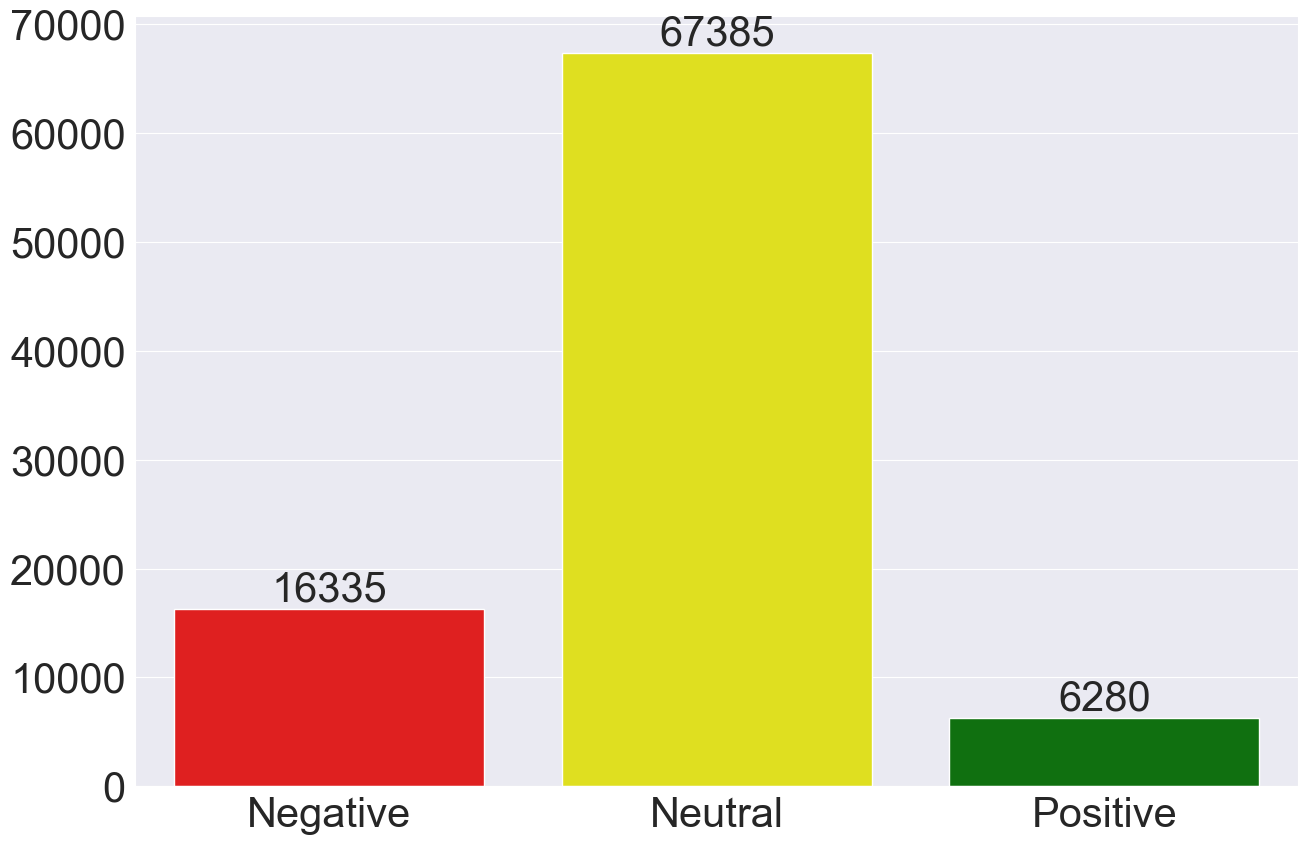

In [22]:
Y = counts
COLORS = ["red", "yellow", "green"]

names = ['Negative', 'Neutral', 'Positive']
sns.set_style("darkgrid")
ax = sns.barplot(x=names, y=Y, palette=COLORS)
for bars in ax.containers:
    ax.bar_label(bars, fmt="%.f")

plt.show()

# Russian Troll

In [23]:
sub = pd.read_csv('../data/russian-troll-tweets/IRAhandle_tweets_2.csv')

In [24]:
dfs = []

for i in trange(1, 9):
    sub = pd.read_csv('../data/russian-troll-tweets/IRAhandle_tweets_'+str(i)+'.csv')
    dfs.append(sub)
    
df = pd.concat(dfs)
df

100%|██████████| 8/8 [00:11<00:00,  1.40s/it]


,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll
3,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll
4,9.060000e+17,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378290,1.513801e+09,YOUJUSTCTRLC,They'll say some shit anonymously like a cowar...,United States,English,1/7/2017 7:47,1/7/2017 7:48,2655,2724,3007,RETWEET,left,0,1,LeftTroll
378291,1.513801e+09,YOUJUSTCTRLC,Mr. Brown knees https://t.co/LmAiHCnFlz,United States,English,1/7/2017 7:47,1/7/2017 7:48,2655,2724,3006,RETWEET,left,0,1,LeftTroll
378292,1.513801e+09,YOUJUSTCTRLC,"Like, you want somebody who follows you regula...",United States,English,1/7/2017 7:47,1/7/2017 7:47,2655,2724,3005,RETWEET,left,0,1,LeftTroll
378293,1.513801e+09,YOUJUSTCTRLC,"If you wanna ask me something, ask it here so ...",United States,English,1/7/2017 7:48,1/7/2017 7:48,2655,2724,3008,RETWEET,left,0,1,LeftTroll


In [25]:
sub = df['account_category'].tolist()
counts = [sub.count(a) for a in df['account_category'].unique()]
better_counts = [] # merge everything that is not left/right 
better_counts.append(counts[3])
better_counts.append(sum(counts)-counts[3]-counts[0])
better_counts.append(counts[0])
better_counts

[418923, 1803716, 713177]

C:\Users\ricca\AppData\Local\Temp\ipykernel_7972\1953503545.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=names, y=Y, palette=COLORS)


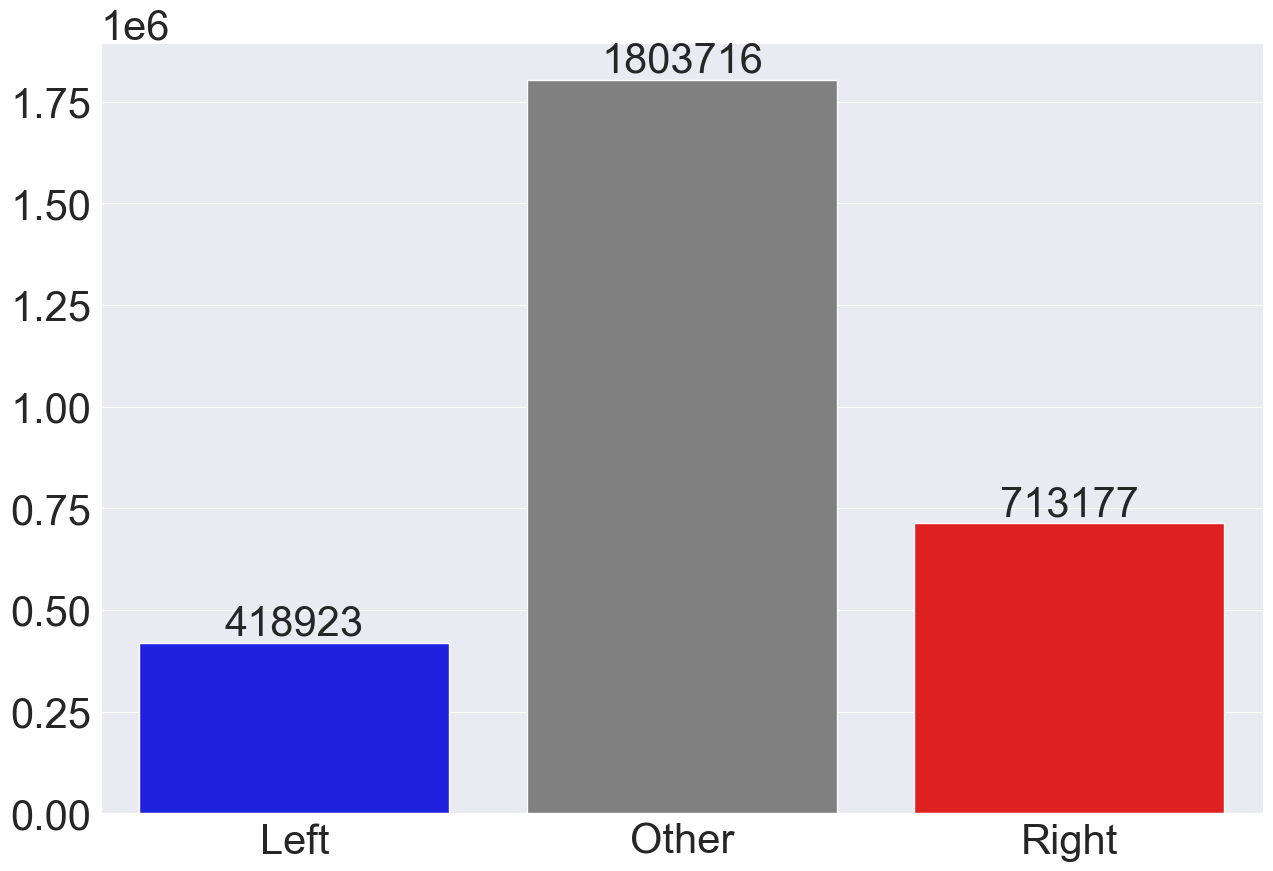

In [26]:
Y = better_counts
COLORS = ["blue", "grey", "red"]

names = ['Left', 'Other', 'Right']
sns.set_style("darkgrid")
ax = sns.barplot(x=names, y=Y, palette=COLORS)
for bars in ax.containers:
    ax.bar_label(bars, fmt="%.f")

#ax.set(title="Stance towards 'face masks'")
plt.show()